# 01 - Exploratory Data Analysis (Full HDFS-v1)

This notebook analyzes the complete HDFS v1 dataset, focusing on event frequencies and temporal distributions.

### Objectives:
1. **Analyze Activity Level**: How many logs are generated per block?
2. **Temporal Distribution**: Analyze the duration of each block session.
3. **Class Balance**: Understand the rarity of anomalies.

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

sns.set_theme(style="whitegrid")

data_path = '../data/X_features.csv'

if os.path.exists(data_path):
    df = pd.read_csv(data_path, index_col=0)
    print(f"Full dataset loaded: {len(df)} block sessions.")
else:
    print("Error: X_features.csv not found.")

Full dataset loaded: 575061 block sessions.


## 1. Class Balance

Cybersecurity datasets are typically imbalanced. We verify the ratio of `Normal` vs `Anomaly`.

C:\Users\Said\AppData\Local\Temp\ipykernel_5804\3662971485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='coolwarm')


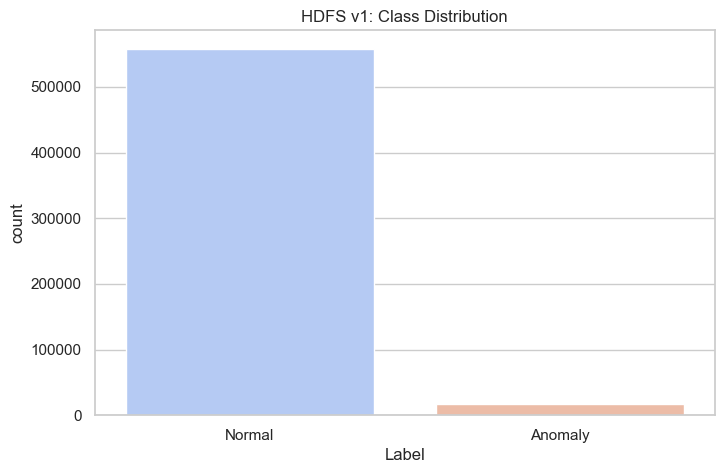

Percentage of Anomalies:
Label
Normal     97.071963
Anomaly     2.928037
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', palette='coolwarm')
plt.title('HDFS v1: Class Distribution')
plt.show()

print("Percentage of Anomalies:")
print(df['Label'].value_counts(normalize=True) * 100)

## 2. Temporal Analysis: Session Duration

We check if the time taken for a block's operations (duration) is a good indicator of abnormality.

In [12]:
if 'SessionDuration' in df.columns:
    plt.figure(figsize=(14, 7))
    # Sample for performance
    sample_df = df.sample(min(100000, len(df)))
    sns.kdeplot(data=sample_df, x='SessionDuration', hue='Label', fill=True, common_norm=False)
    plt.title('Distribution of Session Duration (Temporal Variable)')
    plt.xlabel('Duration (Seconds)')
    plt.show()